In [1]:
### IMPORTS
import os
import glob
import json
#import util

import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from torch.autograd import Variable
import torch.nn.init as init

from collections import defaultdict
from collections import Counter

from datetime import datetime

import SimpleITK as sitk

In [2]:
# all the model architecture information is in the plans.json file:
plans_json_path = r"C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset002_PancreasLesion\AttentionnUNetTrainer__AttentionnUNetPlans__3d_fullres\plans.json"

# the model files:
saved_model_path = r"C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset002_PancreasLesion\AttentionnUNetTrainer__AttentionnUNetPlans__3d_fullres\fold_0\checkpoint_final.pth"

saved_model_paths = [saved_model_path.replace('fold_0', 'fold_' + str(i)) for i in range(1)]



In [4]:
#pickle = torch.load(saved_model_path, weights_only = False)

#network_weights = pickle['network_weights']

#for key, value in pickle.items():
#    print(key)

network_weights
optimizer_state
grad_scaler_state
logging
_best_ema
current_epoch
init_args
trainer_name
inference_allowed_mirroring_axes


In [3]:
for key, value in pickle['logging'].items():
    print(key)



NameError: name 'picke' is not defined

In [17]:
#for key, value in pickle['logging']['dice_per_class_or_region'].items():
#    print(key)



     train pancreas dice  train lesion dice
0               0.474920           0.000000
1               0.633061           0.000000
2               0.727856           0.000000
3               0.738956           0.522162
4               0.759710           0.528771
..                   ...                ...
170             0.912466           0.819403
171             0.906472           0.824269
172             0.913015           0.817304
173             0.904498           0.832460
174             0.910076           0.855373

[175 rows x 2 columns]


In [3]:
for i, saved_model_path in enumerate(saved_model_paths):
    print(saved_model_path)

C:\Users\Leo\Documents\UHN-MedImg3D-ML-quiz\nnUNet_results\Dataset002_PancreasLesion\AttentionnUNetTrainer__AttentionnUNetPlans__3d_fullres\fold_0\checkpoint_final.pth


In [4]:
log_df = pd.DataFrame()

for i, saved_model_path in enumerate(saved_model_paths):
    pickle = torch.load(saved_model_path, weights_only = False)

    network_weights = pickle['network_weights']    # all of the weights are here

    #print(train_dice_df)

    logging = pickle['logging']   # the dice scores and training/val loss are here

    
    temp_df = pd.DataFrame(logging['dice_per_class_or_region'], columns =['train pancreas dice ' + str(i), 'train lesion dice ' + str(i)]) 
    train_losses = logging['train_losses']
    val_losses = logging['val_losses']

    temp_df['train loss ' + str(i)] = train_losses
    temp_df['val loss '+ str(i)] = val_losses

    log_df = pd.concat([log_df, temp_df], axis=1)
    #save the train and val losses to a csv file to plot




In [5]:
log_csvpath = r'C:\Users\Leo\OneDrive\Documents\GitHub\WangLabQuiz\csv files\segmentation_training_log.csv'   # csv with the image dimensions, image and mask file paths

#log_df.to_csv(log_csvpath)
    
print(log_df)

   train pancreas dice 0 train lesion dice 0  train loss 0  val loss 0
0                    NaN                 NaN      1.151837    1.110246
1                    NaN                 NaN      1.111056    1.066071
2                    NaN                 NaN      1.086084    1.085025
3                    NaN                 NaN      1.068955    1.056494
4                    NaN                 NaN      1.043730    1.043687
5                    NaN                 NaN      1.034337    1.037218
6                    NaN                 NaN      1.000002    1.059704
7                    NaN                 NaN      1.002069    1.035182
8                    NaN                 NaN      0.999154    1.050698
9                    NaN                 NaN      0.976897    1.016986
10                   NaN                 NaN      0.917385    1.136039
11                   NaN                 NaN      0.879336    1.012444
12                   NaN                 NaN      0.907434    1.024971
13    

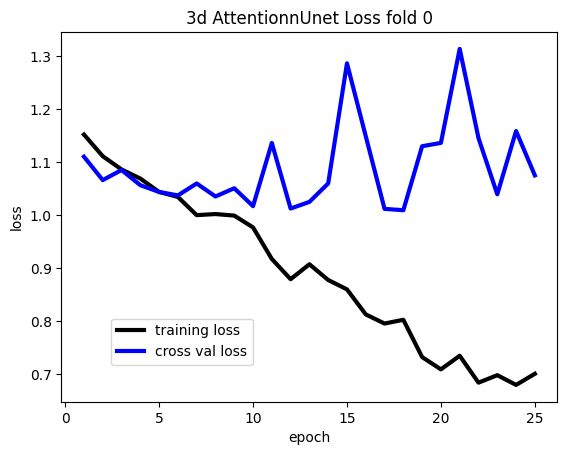

In [9]:
def plot_training_curves(train_loss, val_loss, pancreas_dice, lesion_dice, fold):
    epochs = log_df.index.values + 1
          
    #sns.set(font_scale=2.5)
    #fig, ax_all = plt.subplots(3, 1, figsize=(30, 54))
    plt.figure()
    ax = plt.axes()  #figsize=(30, 54))
    ax.set_title('3d AttentionnUnet Loss fold ' + str(fold))
    #ax2 = ax.twinx()

    x_values = epochs
    #ax.plot(x_values, self.my_fantastic_logging['train_losses'][:epoch + 1], color='b', ls='-', label="training loss", linewidth=4)
    ax.plot(x_values, train_loss, color='k', ls='-', label="training loss", linewidth=3)
    ax.plot(x_values, val_loss, color='b', ls='-', label="cross val loss", linewidth=3)
    #ax2.plot(x_values, pancreas_dice, color='g', ls='-', label="pancreas dice", linewidth=3)
    #ax2.plot(x_values, lesion_dice, color='r', ls='-', label="lesion dice", linewidth=3)
    ax.set_xlabel("epoch")
    ax.set_ylabel("loss")
    #ax2.set_ylabel("dice score")
    ax.legend(loc=(0.1, 0.1))
    #ax2.legend(loc=(0.6, 0.5))


for i in range(1):
    train_loss = log_df['train loss ' + str(i)]
    val_loss = log_df['val loss ' + str(i)]

    pancreas_dice = None #log_df['train pancreas dice ' + str(i)]
    lesion_dice = None #log_df['train lesion dice ' + str(i)]

    plot_training_curves(train_loss, val_loss, pancreas_dice, lesion_dice, i)

In [7]:
print(log_df.index.values + 1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
